In [3]:
import pandas as pd

In [4]:
mydataset =pd.read_csv('country_wise_latest_1.csv')
print(mydataset)

         Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0         

In [7]:
 #Group Data by Country and Region
mydataset.groupby("WHO Region").size().to_frame(name="Record Count").reset_index()

,WHO Region,Record Count
0,Africa,48
1,Americas,35
2,Eastern Mediterranean,22
3,Europe,56
4,South-East Asia,10
5,Western Pacific,16


In [8]:
#Summarize Case Counts by Region 
# - Display total confirmed, death, and recovered cases for each region
mydataset.groupby('WHO Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered' : 'sum'}).reset_index()

,WHO Region,Confirmed,Deaths,Recovered
0,Africa,723207,12223,440645
1,Americas,8839286,342732,4468616
2,Eastern Mediterranean,1490744,38339,1201400
3,Europe,3299523,211144,1993723
4,South-East Asia,1835297,41349,1156933
5,Western Pacific,292428,8249,206770


In [13]:
mydataset.loc[:,"WHO Region"]


0      Eastern Mediterranean
1                     Europe
2                     Africa
3                     Europe
4                     Africa
               ...          
182    Eastern Mediterranean
183                   Africa
184    Eastern Mediterranean
185                   Africa
186                   Africa
Name: WHO Region, Length: 187, dtype: object

In [16]:
mydataset.groupby('WHO Region')['Confirmed'].sum()

WHO Region
Africa                    723207
Americas                 8839286
Eastern Mediterranean    1490744
Europe                   3299523
South-East Asia          1835297
Western Pacific           292428
Name: Confirmed, dtype: int64

In [9]:
#Filter Low Case Records 
# - Exclude entries where confirmed cases are < 10.

mydataset[mydataset["Confirmed"]>10]

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Vietnam,431,0,365,66,11,0,0,0.00,84.69,0.00,384,47,12.24,Western Pacific
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [ ]:

mydataset.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [25]:
#Identify Region with Highest Confirmed Cases 
print(mydataset["Confirmed"].idxmax())
mydataset.loc[mydataset["Confirmed"].idxmax(),"Country/Region"]

173


'US'

In [ ]:
#Identify Country in each WHO Region with Highest Confirmed Cases 

max_id = mydataset.groupby("WHO Region")["Confirmed"].idxmax()
print(mydataset.loc[max_id,['Country/Region','WHO Region','Confirmed']])

    Country/Region             WHO Region  Confirmed
154   South Africa                 Africa     452529
173             US               Americas    4290259
81            Iran  Eastern Mediterranean     293606
138         Russia                 Europe     816680
79           India        South-East Asia    1480073
36           China        Western Pacific      86783


In [111]:
#Sort Data by Confirmed Cases 
# - Save sorted dataset into a new CSV file.

Sorted_DataSet = mydataset.sort_values(by='Confirmed') 
print(Sorted_DataSet[["Country/Region","Confirmed"]])
Sorted_DataSet.to_csv("Sorted.csv",index=False)

            Country/Region  Confirmed
183         Western Sahara         10
75                Holy See         12
68               Greenland         14
140  Saint Kitts and Nevis         17
49                Dominica         18
..                     ...        ...
154           South Africa     452529
138                 Russia     816680
79                   India    1480073
23                  Brazil    2442375
173                     US    4290259

[187 rows x 2 columns]


In [105]:
mydataset.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [107]:
# Top 5 Countries by Case Count
Decending_Data_Set = mydataset.sort_values(by="Confirmed",ascending=False)
Decending_Data_Set.head()[["Country/Region","Confirmed"]]

,Country/Region,Confirmed
173,US,4290259
23,Brazil,2442375
79,India,1480073
138,Russia,816680
154,South Africa,452529


In [64]:
# Region with Lowest Death Count
mydataset.loc[mydataset["Confirmed"].idxmin(),["Country/Region"]]

Country/Region    Western Sahara
Name: 183, dtype: object

In [68]:
# Loweest WHO Region Lowest Death Count
mydataset.groupby("WHO Region")["Confirmed"].idxmin().idxmin()

'Europe'

In [80]:
# India’s Case Summary (as of April 29, 2020) 
mydataset[mydataset["Country/Region"]=="India"]

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia


In [ ]:
mydataset.loc[:,"WHO Region"].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [87]:
# Calculate Mortality Rate by Region 
# - Death-to-confirmed case ratio. 

Confirmed_Total_RegionWise = mydataset.groupby("WHO Region")["Confirmed"].sum()
Death_Total_RegionWise = mydataset.groupby("WHO Region")["Deaths"].sum()
( Death_Total_RegionWise / Confirmed_Total_RegionWise ) *100

WHO Region
Africa                   1.690111
Americas                 3.877372
Eastern Mediterranean    2.571803
Europe                   6.399228
South-East Asia          2.252987
Western Pacific          2.820865
dtype: float64

In [88]:
# Compare Recovery Rates Across Regions

Confirmed_Total_RegionWise = mydataset.groupby("WHO Region")["Confirmed"].sum()
Recovered_Total_RegionWise = mydataset.groupby("WHO Region")["Recovered"].sum()
( Recovered_Total_RegionWise / Confirmed_Total_RegionWise ) *100

WHO Region
Africa                   60.929305
Americas                 50.554038
Eastern Mediterranean    80.590631
Europe                   60.424583
South-East Asia          63.037917
Western Pacific          70.708003
dtype: float64

In [90]:
#  Detect Outliers in Case Counts 
# - Use mean ± 2*std deviation. 

mean_confirmed = mydataset["Confirmed"].mean()
std_dv_confirmed = mydataset["Confirmed"].std()

# Define the lower and upper bounds for outliers
Upper_Bound_Val = mean_confirmed + 2 * std_dv_confirmed
Lower_Bound_Val = mean_confirmed - 2 * std_dv_confirmed

# Outliers Calculation
print(mydataset[(mydataset['Confirmed'] < Upper_Bound_Val) | (mydataset['Confirmed'] > Lower_Bound_Val)])



         Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0         

In [96]:
#  Group Data by Country and Region 
print(mydataset.groupby("WHO Region").size())

WHO Region
Africa                   48
Americas                 35
Eastern Mediterranean    22
Europe                   56
South-East Asia          10
Western Pacific          16
dtype: int64


In [137]:
mydataset.loc[( mydataset["Recovered"] > 1000 ) & ( mydataset["Deaths"] > 1000 )]

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
13,Bangladesh,226225,2965,125683,97577,2772,37,1801,1.31,55.56,2.36,207453,18772,9.05,South-East Asia
16,Belgium,66428,9822,17452,39154,402,1,14,14.79,26.27,56.28,64094,2334,3.64,Europe
20,Bolivia,71181,2647,21478,47056,1752,64,309,3.72,30.17,12.32,60991,10190,16.71,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
36,China,86783,4656,78869,3258,213,4,7,5.37,90.88,5.90,85622,1161,1.36,Western Pacific
37,Colombia,257101,8777,131161,117163,16306,508,11494,3.41,51.02,6.69,204005,53096,26.03,Americas


In [ ]:
# Identify Regions with Zero Recovered Cases 
mydataset[(mydataset["Recovered"] > 1000) & (mydataset["Deaths"] > 500)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [118]:
mydataset.head(12)[['Country/Region','Recovered','Confirmed']]

,Country/Region,Recovered,Confirmed
0,Afghanistan,25198,36263
1,Albania,2745,4880
2,Algeria,18837,27973
3,Andorra,803,907
4,Angola,242,950
5,Antigua and Barbuda,65,86
6,Argentina,72575,167416
7,Armenia,26665,37390
8,Australia,9311,15303
9,Austria,18246,20558


In [ ]:
mydataset["Country/Region"].

ValueError: ('Lengths must match to compare', (187,), (2,))

In [5]:
print(mydataset)

         Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0         

#  Week 5 Assignment 

Text(0, 0.5, 'Confirmed Case Count')

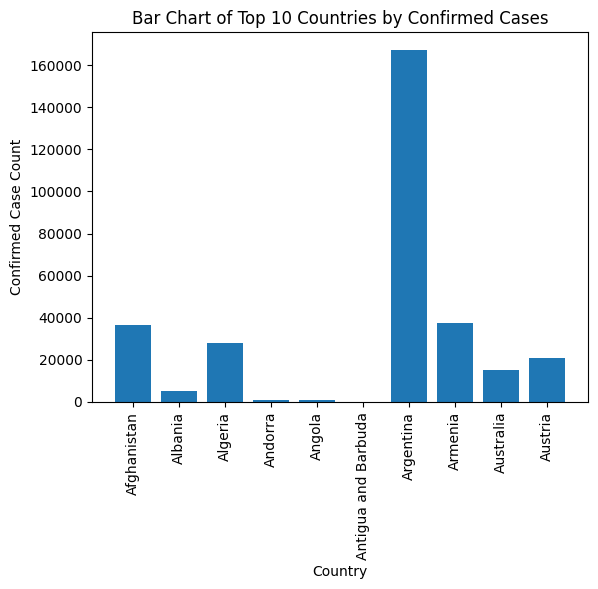

In [46]:
#Bar Chart of Top 10 Countries by Confirmed Cases
import matplotlib.pyplot as plt
mydataset.sort_values(by="Confirmed",ascending=False)
top_10_confirmed_countries = mydataset.head(10).loc[ : , ["Country/Region","Confirmed"]]
top_10_confirmed_countries

plt.bar(top_10_confirmed_countries["Country/Region"],top_10_confirmed_countries["Confirmed"])

# Rotate y-axis tick labels by 90 degrees
plt.xticks(rotation=90)
plt.title("Bar Chart of Top 10 Countries by Confirmed Cases")
plt.xlabel("Country")
plt.ylabel("Confirmed Case Count")



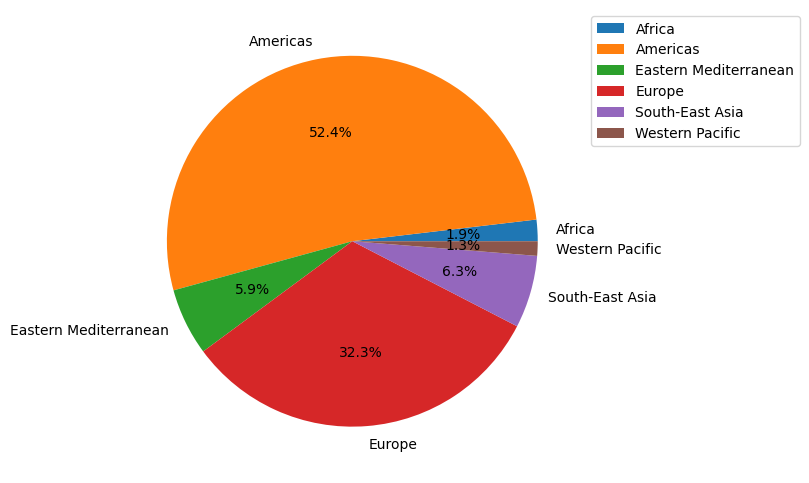

In [ ]:
#Pie Chart of Global Death Distribution by Region
Death_Distribution_By_Region = mydataset.groupby("WHO Region")["Deaths"].sum()
Death_Distribution_By_Region.values
plt.figure(figsize=(8, 8))  # Increase figure size
plt.pie(Death_Distribution_By_Region.values,autopct='%1.2f%%',labels=Death_Distribution_By_Region.index)
#Adding legend to pie chart and display on top left
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.tight_layout() # Adjust layout to prevent overlap

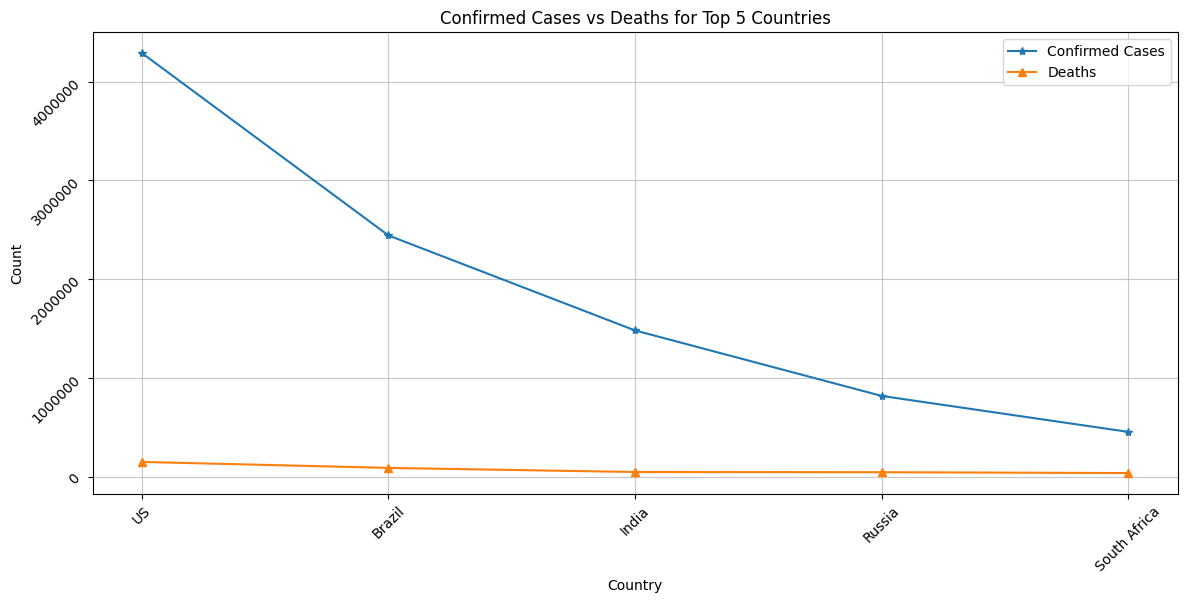

In [ ]:
#Line Chart comparing Confirmed and Deaths for Top 5 Countries

#Top_5_Confirmed_Countries = mydataset.nlargest(5, 'Confirmed')[["Country/Region", "Confirmed"]]
#Top_5_Death_Countries = mydataset.nlargest(5, 'Deaths')[["Country/Region", "Deaths"]]

# Top_5_Confirmed_Countries
# Top_5_Death_Countries
# x_positions = range(len(Top_5_Confirmed_Countries["Country/Region"]))
# plt.plot(x_positions,Top_5_Confirmed_Countries["Confirmed"])

# Get top 5 countries data
Top_5_Countries = mydataset.nlargest(5, 'Confirmed')[["Country/Region", "Confirmed", "Deaths"]]

# Create figure and axis with larger size
plt.figure(figsize=(14, 6))

# Plot both confirmed cases and deaths
x_positions = range(len(Top_5_Countries["Country/Region"]))
plt.plot(x_positions, Top_5_Countries["Confirmed"], marker='*', linestyle='-' , label='Confirmed Cases')
plt.plot(x_positions, Top_5_Countries["Deaths"], marker='^', linestyle='-' , label='Deaths')

# Customize the plot
plt.title("Confirmed Cases vs Deaths for Top 5 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(x_positions, Top_5_Countries["Country/Region"], rotation=45)

# Format y-axis ticks to show actual numbers
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(rotation=45)

plt.grid(True,alpha=0.7)
plt.legend()





C:\Users\Admin\AppData\Local\Temp\ipykernel_25420\2179605865.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mydataset["Country/Region"],mydataset["Confirmed"],alpha=0.5,cmap='rainbow',edgecolors='black',s=500)
C:\Users\Admin\AppData\Local\Temp\ipykernel_25420\2179605865.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mydataset["Country/Region"],mydataset["Recovered"],alpha=0.5,cmap='plasma',edgecolors='black',s=500)


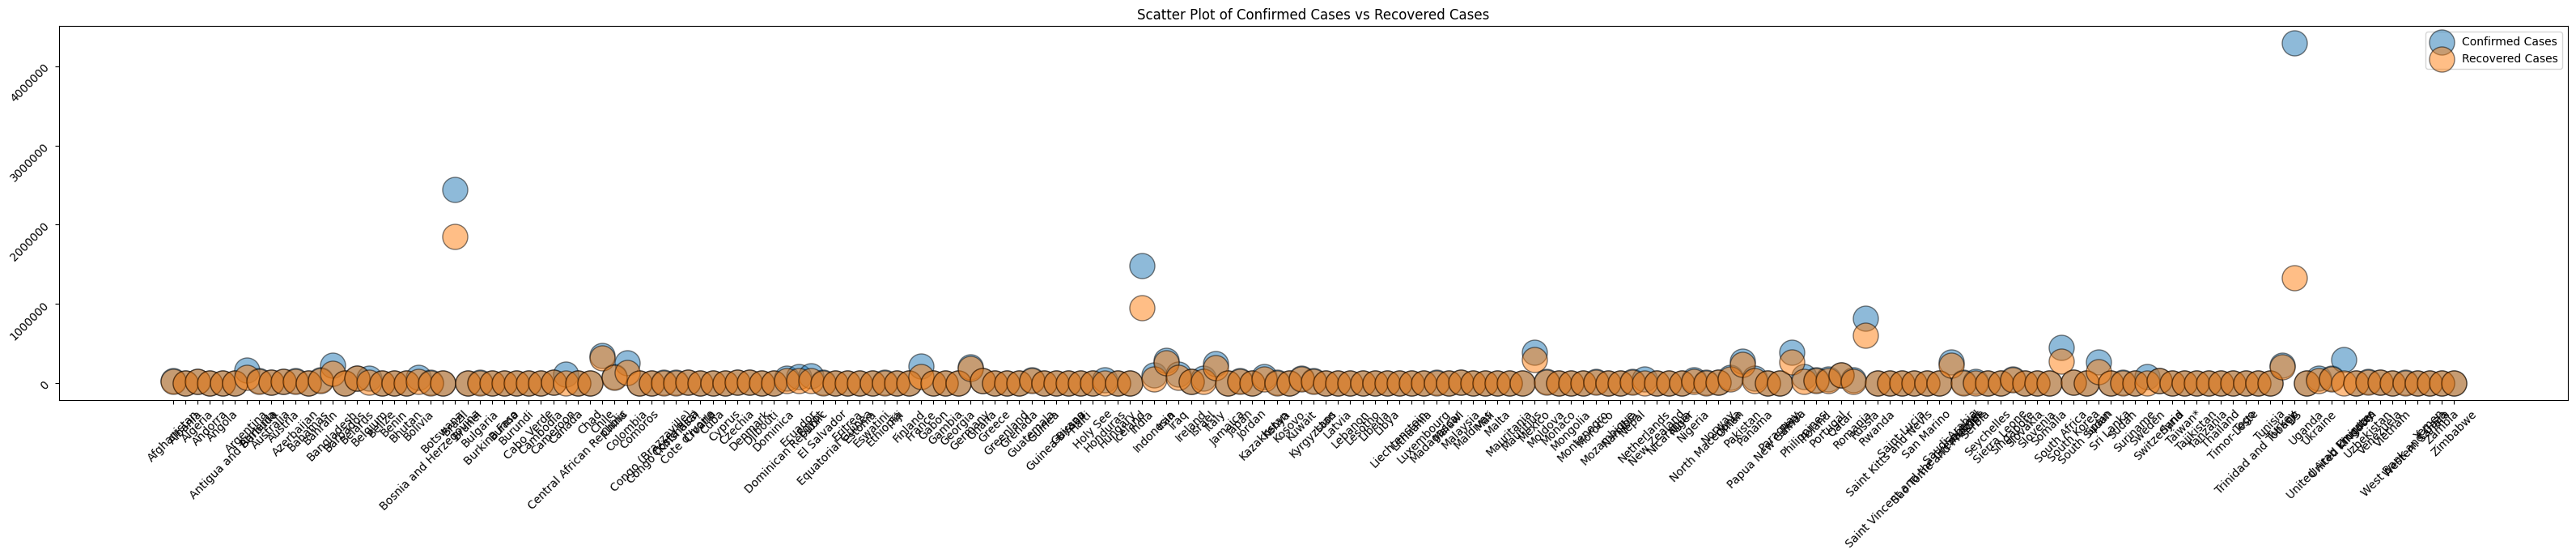

In [69]:
#Scatter Plot of Confirmed Cases vs Recovered Cases
plt.figure(figsize=(40, 6))
plt.scatter(mydataset["Country/Region"],mydataset["Confirmed"],alpha=0.5,cmap='rainbow',edgecolors='black',s=500)
plt.scatter(mydataset["Country/Region"],mydataset["Recovered"],alpha=0.5,cmap='plasma',edgecolors='black',s=500)
plt.title("Scatter Plot of Confirmed Cases vs Recovered Cases")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(rotation=45)
plt.legend(['Confirmed Cases','Recovered Cases'])

Text(0, 0.5, 'Frequency')

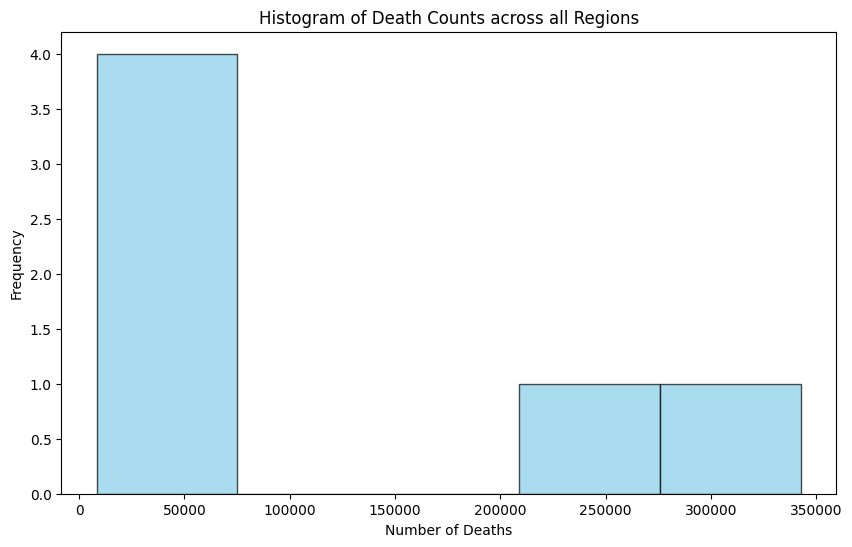

In [50]:
#Histogram of Death Counts across all Regions
WHO_Region_Deaths = mydataset.groupby("WHO Region")["Deaths"].sum()
WHO_Region_Deaths
plt.figure(figsize=(10, 6))
plt.hist(mydataset.groupby("WHO Region")["Deaths"].sum(), bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Histogram of Death Counts across all Regions")
plt.xlabel("Number of Deaths")
plt.ylabel("Frequency")     


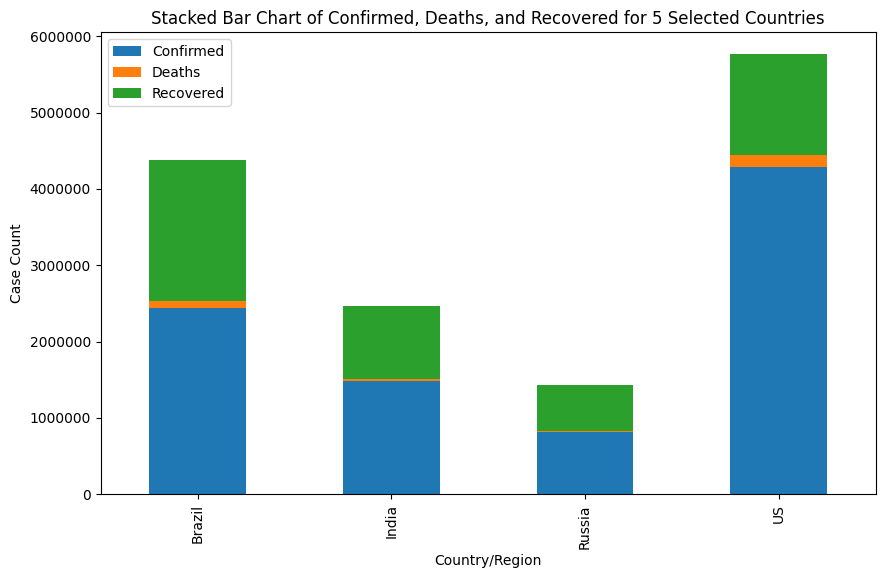

In [51]:
#Stacked Bar Chart of Confirmed, Deaths, and Recovered for 5 Selected Countries
selected_countries = mydataset[mydataset["Country/Region"].isin(["US", "India", "Brazil", "Russia", "UK"])]
selected_countries.set_index("Country/Region",inplace=True)
selected_countries[["Confirmed","Deaths","Recovered"]].plot(kind='bar',stacked=True,figsize=(10,6))
plt.title("Stacked Bar Chart of Confirmed, Deaths, and Recovered for 5 Selected Countries")
plt.ylabel("Case Count")
plt.ticklabel_format(style='plain', axis='y')

![alt text](<Screenshot 2025-09-30 112951.png>)
Explaination of Box Plot

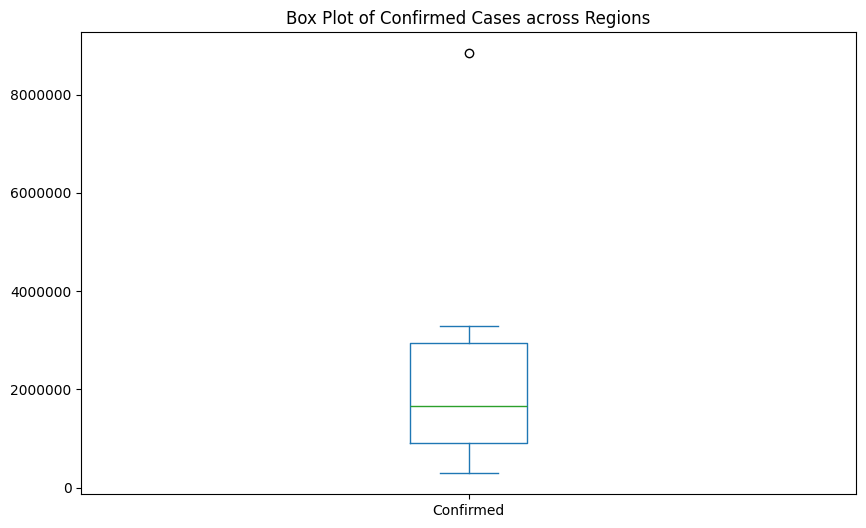

In [52]:
#Box Plot of Confirmed Cases across Regions

plt.figure(figsize=(10, 6))
mydataset.groupby("WHO Region")["Confirmed"].sum().plot(kind='box',figsize=(10,6))
plt.title("Box Plot of Confirmed Cases across Regions") 
plt.ticklabel_format(style='plain', axis='y')

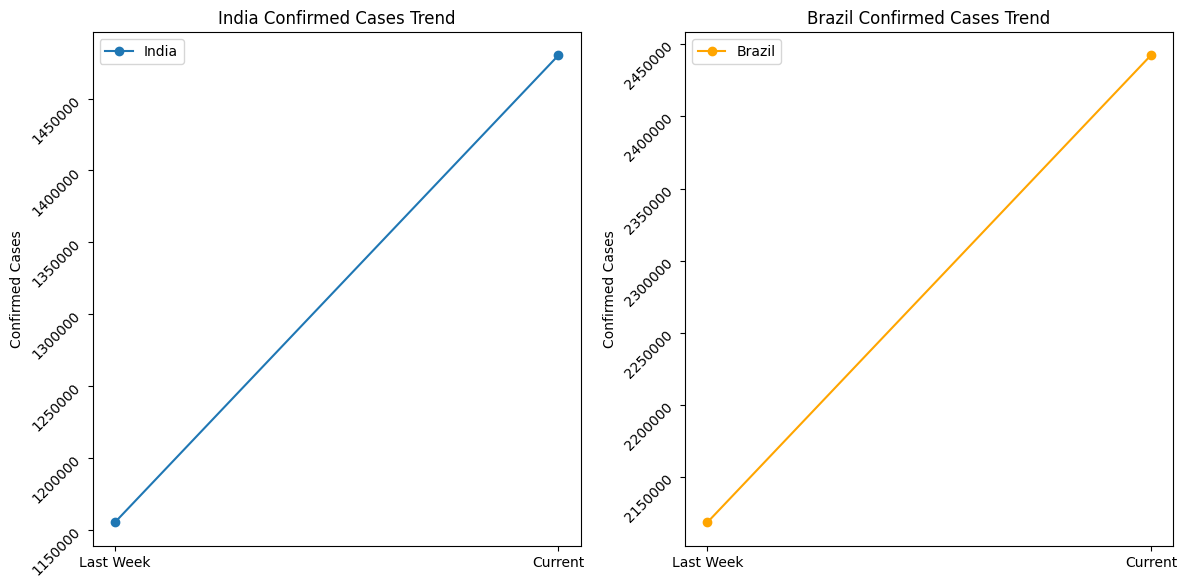

In [66]:
# Trend Line: Plot Confirmed cases for India vs another chosen country (side by side comparison)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# India
india_data = mydataset[mydataset["Country/Region"] == "India"]
ax[0].plot(["Last Week", "Current"], [india_data["Confirmed last week"].values[0], india_data["Confirmed"].values[0]], marker='o')
ax[0].set_title("India Confirmed Cases Trend")
ax[0].set_ylabel("Confirmed Cases")
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["Last Week", "Current"])
ax[0].legend(['India'], loc='upper left')
ax[0].ticklabel_format(style='plain', axis='y')
for label in ax[0].get_yticklabels():
	label.set_rotation(45)

# Brazil (chosen country)
brazil_data = mydataset[mydataset["Country/Region"] == "Brazil"]
ax[1].plot(["Last Week", "Current"], [brazil_data["Confirmed last week"].values[0], brazil_data["Confirmed"].values[0]], marker='o', color='orange')
ax[1].set_title("Brazil Confirmed Cases Trend")
ax[1].set_ylabel("Confirmed Cases")
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["Last Week", "Current"])
ax[1].legend(['Brazil'], loc='upper left')
ax[1].ticklabel_format(style='plain', axis='y')
for label in ax[1].get_yticklabels():
	label.set_rotation(45)
plt.tight_layout()
             

In [58]:
mydataset[mydataset["Country/Region"] == "India"]

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
